# Analysis of Belize Airbnb Data

In [21]:
#setup notenook by importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
#read in the Belize data from the csv file/
belize_path = '../week_05/belize_airbnb_listings.csv'

#read in the data and save as a dataframe
belize_df = pd.read_csv(belize_path)
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


1.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
   
   a.	How do you choose your bin size?
   
   When determining bin size and bin number you need to consider the range of your dataset and the number of observations. There are many methods to consider when determining bin size and number of bins.  Two that I looked into were the Freedman-Diaconis Method and the Rice Rule.  Both consider the total number of observations when determining the bin number and the Freedman Diaconis Method also considers the IQR.  The Rice Rule gave me a lot less bins for both datasets shown below.  In addition to considering your range of values and number of observations, you want to make sure you are capturing all secondary maximums and creating widths that are easy to interpret when reading the graph.  I chose to use 24 bins for the reviews per month data because it was close to the estimate given by the Rice Rule and broke it up well so that each bin was about 0.25 in width.  I chose to use 31 bins for the number of reviews data because each bin was about 10 in width and the number of bins was close to the estimate found by the Rice Rule.  




0.08375992599356602
70.55880159748439
28.17576510491762


<AxesSubplot:>

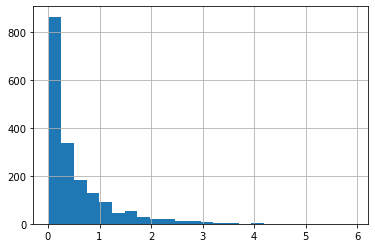

In [77]:
#Find the max of the reviews per month data
belize_df['reviews_per_month'].max()
#Find the min of the data
belize_df['reviews_per_month'].min()
#Find the range of the data
reviews_per_month_range = belize_df['reviews_per_month'].max()-belize_df['reviews_per_month'].min()
#Find the number of observations, n
n = len(belize_df['reviews_per_month'])
#Find the IQR
reviews_iqr = scipy.stats.iqr(belize_df['reviews_per_month'], nan_policy='omit')
#Calculate bin width using the Freedman-Diaconis Method
bin_width_reviews = (2 * reviews_iqr)/(n**(1/3))
print(bin_width_reviews)
#Find number of bins
num_bins_reviews = reviews_per_month_range/bin_width_reviews
print(num_bins_reviews)
#Use Rice Rule to find number of bins
num_bins_2 = 2 * (n**(1/3))
print(num_bins_2)
belize_df['reviews_per_month'].hist(bins=24)

1.8455576913836582
171.22195717603785
28.17576510491762


<AxesSubplot:>

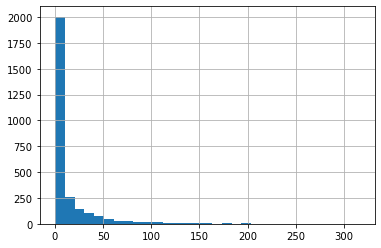

In [79]:
#Find the max of the number of reviews data
belize_df['number_of_reviews'].max()
#Find the min of the data
belize_df['number_of_reviews'].min()
#Find the range of the data
num_reviews_range = belize_df['number_of_reviews'].max()-belize_df['number_of_reviews'].min()
#Find the number of observations, n
n = len(belize_df['number_of_reviews'])
#Find the IQR
num_reviews_iqr = scipy.stats.iqr(belize_df['number_of_reviews'], nan_policy='omit')
#Calculate bin width using the Freedman-Diaconis Method
bin_width_num_reviews = (2 * num_reviews_iqr)/(n**(1/3))
print(bin_width_num_reviews)
#Find number of bins
num_bins_num_reviews = num_reviews_range/bin_width_num_reviews
print(num_bins_num_reviews)
#Use Rice Rule to find number of bins
num_bins_2 = 2 * (n**(1/3))
print(num_bins_2)
#display histogram
belize_df['number_of_reviews'].hist(bins=31)

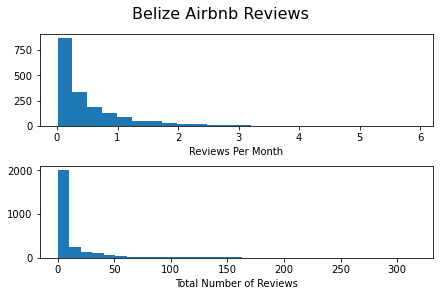

In [80]:
#Put the plots together as subplots 
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].hist(belize_df['reviews_per_month'], bins=24)
axs[0].set_xlabel('Reviews Per Month')
fig.suptitle('Belize Airbnb Reviews', fontsize=16)

axs[1].hist(belize_df['number_of_reviews'], bins=31)
axs[1].set_xlabel('Total Number of Reviews')


plt.show()

2.	Create a box and whisker plot for availability_365. What does this show you?
The box and whisker plot for the availability_365 data shows you the median for the Belize Airbnb availability for rentals which is 349 days of availability. This is represented with the orange line.  The top of the box is the 75th percentile of the dataset (meaning 75% of the data falls below that value) and the bottom of the box is the 25th percentile of the dataset.  For this data, 50% of the rentals have availability 221 and 364 days of the year.  The whiskers on the box and whisker plot represent the 5th and 95th percentile of the data.  This gives you a snapshot of the median of the data and the variability of the data.  

349.0
221.0
364.0
0.0
365.0


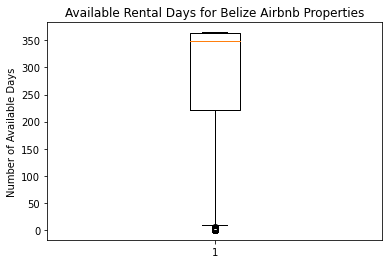

In [90]:
plt.boxplot(belize_df['availability_365'], showfliers=None)
plt.title("Available Rental Days for Belize Airbnb Properties")
plt.ylabel("Number of Available Days")
print(belize_df['availability_365'].median())
q3, q1 = np.percentile(belize_df['availability_365'], [75 ,25])
print(q1)
print(q3)
bottom_5, top_5 = np.percentile(belize_df['availability_365'], [5,95])
print(bottom_5)
print(top_5)

3.	What is the probability that the price for an Airbnb is under 50 dollars.
There is only a 1.75 percent chance that a rental property in Belize is under 50 dollars per night.

a.	What do you notice about these records? Hint: look at the other columns.
These rentals tend to be shared rooms or private rooms (not full houses). The location seems to be mostly Cayo and Belize Mainland.

b.	What distribution does this data most closely fit?
This data most closely resembles a logarithmic (log normal) distribution.

49
2796
1.7525035765379111


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
134,4005831,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51482,-88.22233,Private room,20,1,2,3/1/2020,0.03,10,365
148,4304743,"DORMITORY Bed #1 of 6, on Maya Ruin",2084006,Lower Dover,Cayo,Cayo,17.21379,-88.94974,Shared room,36,1,1,2/10/2020,0.08,4,365
172,4936432,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51426,-88.22121,Shared room,20,1,16,2/4/2020,0.24,10,365
189,5509363,"Yaxche Jungle Camp, Dormitory",6960726,Yaxche Jungle Camp,Cayo,Cayo,17.15125,-88.66244,Shared room,24,1,30,2/25/2020,0.42,2,365
196,5717367,Comfortable and Ecological Camping,29641332,Minerva,Cayo,Cayo,17.05410,-89.11378,Entire home/apt,30,1,6,10/16/2017,0.09,1,365


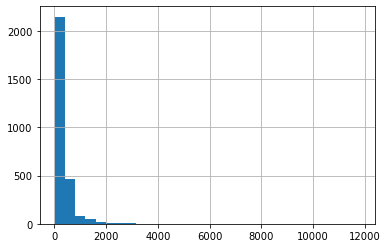

In [110]:
belize_df['price'].hist(bins=30)
num_less_than_50 = belize_df['price'][belize_df['price'] < 50].count()
total_count = belize_df['price'].count()
print(num_less_than_50)
print(total_count)
prob_price_less_than_50 = (num_less_than_50)/total_count
print((prob_price_less_than_50)*100)
new_df = belize_df[belize_df['price']<50]
new_df.head()

4.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
a.	Why sample variance and not population variance?
We should use sample variance because we want a statistic for the sample of data that was collected and is available in the Belize Data.  If we were to collect new data, our sample variance may change slightly, but if the data is collected randomly and with proper techniques it should be close to the population variance. 
b.	What is your takeaway for each metric?
The price for Airbnbs in Belize have a very large range (variability) meaning the prices are spread out a lot from the mean price. On average, the rental properties vary by over 563 dollars away from the mean price.   Minimum nights has a much lower variability and standard deviation.  On average, each Airbnb minimum number of rental nights only differs by about 5.6 nights from the mean. Number of reviews also has a high variability, while reviews per month has a much lower variability and standard deviation. Most rentals properties have a similar number of reviews per month with the average reviews per month only 0.66 reviews per month away from the mean.  The number of listings per host has a large variability about the mean with the average number of host listings about 50 listings away from the mean. And average availability of rental properties is over 120 days away from the mean availability.    
c.	What are the scales of measurement for each of these values? 
Variability is in dollars squared for price, number of nights squared, reviews per month squared, number of listings squared and number of days squared, while standard deviation is measured in the standard unit for each variable (dollars for price, number of days for minimum_nights and availability, and number of reviews or listings. 


In [117]:
#Use agg to get both standard deviation and sample variance in the same column.
belize_df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].agg([np.var, np.std])

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
var,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157
std,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


5.	What percent of Airbnb listings in Belize are available 360 days a year or more?
About 39 percent of Airbnb listings are available 360 days a year or more.
a.	360 days or less?
About 61 percent of Airbnb listings are available 360 days a year or less. 
b.	What distribution does this data most closely fit?
The distribution looks most like a logarithmic (log normal) distribution because there are so many rentals with lots of availability. It is left-skewed.


<AxesSubplot:>

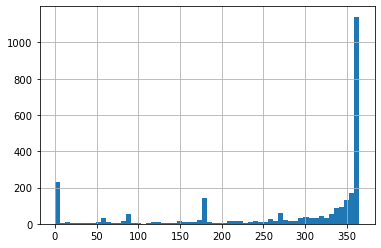

In [127]:
belize_df['availability_365'].hist(bins=60)

In [121]:
num_greater_than_360 = belize_df['availability_365'][belize_df['availability_365'] >= 360].count()
total_count = belize_df['availability_365'].count()
print(num_greater_than_360)
print(total_count)
percent_availability_greater_than_360 = (num_greater_than_360)/total_count
print((percent_availability_greater_than_360)*100)
new_availability_df = belize_df[belize_df['availability_365']>=360]
new_availability_df.head()

1105
2796
39.52074391988555


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
8,152922,rent a private room in a house,735525,Jennifer,Cayo,Cayo,17.25395,-88.76870,Private room,52,1,11,12/14/2019,0.18,1,364
9,171294,King Deluxe,817242,Michael,Cayo,Cayo,17.16261,-89.06995,Private room,286,1,40,2/3/2020,0.47,8,362
22,308361,Villa San Juan,1586187,Jorge Omar,Cayo,Cayo,17.25812,-88.77895,Private room,210,1,4,8/24/2018,0.05,1,365
26,521581,Heart of Belize City: Live-Work-Play,345885,Melissa,Belize,Belize Mainland,17.50751,-88.18791,Entire home/apt,482,4,3,2/1/2020,0.03,4,365


In [123]:
num_less_than_360 = belize_df['availability_365'][belize_df['availability_365'] <= 360].count()
total_count = belize_df['availability_365'].count()
print(num_less_than_360)
print(total_count)
percent_availability_less_than_360 = (num_less_than_360)/total_count
print((percent_availability_less_than_360)*100)
new_availability_df = belize_df[belize_df['availability_365']<=360]
new_availability_df.head()

1721
2796
61.55221745350501


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
5,120116,Valarosa,604999,Bobbi,Belize,Belize Islands,17.73644,-88.02858,Entire home/apt,171,2,49,3/23/2020,0.80,22,0


6.	What minimum night count are 75% of Airnbnb listing in Belize greater than?
75% of Airbnb listings have a minimum night count of less than 3 nights. 


<AxesSubplot:>

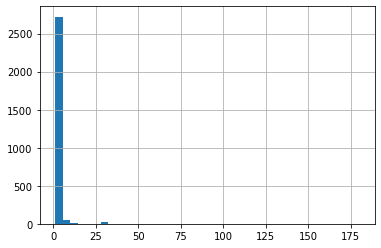

In [129]:
belize_df['minimum_nights'].hist(bins=40)

In [136]:
q3 = np.percentile(belize_df['minimum_nights'], 75)
print(q3)

3.0
